Tried to perform multiple experiments to test problem accuracy.

1. Against Full Data Set:

       Performed 3 differnet experiments with different parameters. Primarily changed the "learning rate" and "number of epochs", and the rest kept same across experiments.

	
  Changed Parameters:
	
    learning_rate = 0.001 ,  0.00001, 0.0002
	epochs = 100, 20, 50
	
	
  Same parameters:
	
	batch_size = 500
	n_classes = 10
	n_samples = 55000
	n_input = 784
	n_hidden_1 = 1024
	n_hidden_2 = 1024
	n_hidden_3 = 1024
	n_hidden_4 = 1024
	n_hidden_5 = 1024

2. Modeling with SV

	Created multiple variation of the models by veriying the parameter "D" and captured performenace changes for MNIST datset.
	
	Used D = [Full , 10, 20, 50, 100, 200]

	For each D, perfomed 2 SVD experiments;
	1. Where kept SVD outside of Network.
	2. Where kept SVD a part of Network.

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# Reading the input data with one-hot encoded equals true. With one-hot encoded the label will be having value as "1" for one of the index positions 
#from 0 to 9. And, for the rest the value will be "0"

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

**Experiments against Full data.**

**Performed 3 experiments with different Iterations/parameters. **

In [0]:
# Initialize param

learning_rate = 0.00001
training_epochs = 100
batch_size = 500 # 100 # 1000
n_classes = 10
n_samples = 55000
n_input = 784
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

# Function ff which will take the input data, hidden-layer neuron and bias and then perform the operation
# output of each layer will get passed to the successor layer.

def network_org(x):
  
  layer_1 = tf.add(tf.matmul(x, hl1), b1)
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1, hl2),b2)
  layer_2 = tf.nn.relu(layer_2)
  
  layer_3 = tf.add(tf.matmul(layer_2, hl3),b3)
  layer_3 = tf.nn.relu(layer_3)
  
  layer_4 = tf.add(tf.matmul(layer_3, hl4),b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, hl5),b5)
  layer_5 = tf.nn.relu(layer_5)  
  
  out_layer = tf.add(tf.matmul(layer_5, hl_out),b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network_org(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

acc_full=[]
ls_full=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size) 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  acc_full.append(acc_val)
  ls_full.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

Instructions for updating:
Colocations handled automatically by placer.
epoch: 1, Loss: 46851616.000000, Accuracy: 0.119300
epoch: 2, Loss: 31916464.000000, Accuracy: 0.185200
epoch: 3, Loss: 23489252.000000, Accuracy: 0.253800
epoch: 4, Loss: 18884722.000000, Accuracy: 0.324100
epoch: 5, Loss: 15795500.000000, Accuracy: 0.389100
epoch: 6, Loss: 13492420.000000, Accuracy: 0.445300
epoch: 7, Loss: 11747933.000000, Accuracy: 0.492600
epoch: 8, Loss: 10392574.000000, Accuracy: 0.530500
epoch: 9, Loss: 9326435.000000, Accuracy: 0.568300
epoch: 10, Loss: 8469757.000000, Accuracy: 0.596900
epoch: 11, Loss: 7765491.500000, Accuracy: 0.621800
epoch: 12, Loss: 7177856.500000, Accuracy: 0.644500
epoch: 13, Loss: 6682342.500000, Accuracy: 0.664000
epoch: 14, Loss: 6257618.500000, Accuracy: 0.681800
epoch: 15, Loss: 5887722.000000, Accuracy: 0.696500
epoch: 16, Loss: 5564363.000000, Accuracy: 0.708700
epoch: 17, Loss: 5284620.000000, Accuracy: 0.721700
epoch: 18, Loss: 5033576.500000, Accuracy: 0.

**Experiment-2**

In [0]:
# Initialize param

learning_rate = 0.0002
training_epochs = 20
batch_size = 500 # 100 # 1000
n_classes = 10
n_samples = 55000
n_input = 784
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

# Function ff which will take the input data, hidden-layer neuron and bias and then perform the operation
# output of each layer will get passed to the successor layer.

def network_org_again(x):
  
  layer_1 = tf.add(tf.matmul(x, hl1), b1)
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1, hl2),b2)
  layer_2 = tf.nn.relu(layer_2)
  
  layer_3 = tf.add(tf.matmul(layer_2, hl3),b3)
  layer_3 = tf.nn.relu(layer_3)
  
  layer_4 = tf.add(tf.matmul(layer_3, hl4),b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, hl5),b5)
  layer_5 = tf.nn.relu(layer_5)  
  
  out_layer = tf.add(tf.matmul(layer_5, hl_out),b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network_org_again(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

acc_full_again=[]
ls_full_again=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size) 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  acc_full_again.append(acc_val)
  ls_full_again.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

Instructions for updating:
Colocations handled automatically by placer.
epoch: 1, Loss: 4853506.500000, Accuracy: 0.727600
epoch: 2, Loss: 2885357.250000, Accuracy: 0.821600
epoch: 3, Loss: 2202154.750000, Accuracy: 0.853200
epoch: 4, Loss: 1857770.750000, Accuracy: 0.874700
epoch: 5, Loss: 1644363.250000, Accuracy: 0.884800
epoch: 6, Loss: 1507178.000000, Accuracy: 0.891100
epoch: 7, Loss: 1386117.500000, Accuracy: 0.895900
epoch: 8, Loss: 1287632.125000, Accuracy: 0.899800
epoch: 9, Loss: 1250080.250000, Accuracy: 0.902300
epoch: 10, Loss: 1179927.500000, Accuracy: 0.906800
epoch: 11, Loss: 1136277.875000, Accuracy: 0.908300
epoch: 12, Loss: 1106805.875000, Accuracy: 0.909900
epoch: 13, Loss: 1078168.000000, Accuracy: 0.911800
epoch: 14, Loss: 1054471.125000, Accuracy: 0.912900
epoch: 15, Loss: 1056459.875000, Accuracy: 0.912200
epoch: 16, Loss: 1032368.750000, Accuracy: 0.912100
epoch: 17, Loss: 1015506.625000, Accuracy: 0.914200
epoch: 18, Loss: 1003296.750000, Accuracy: 0.914900
e

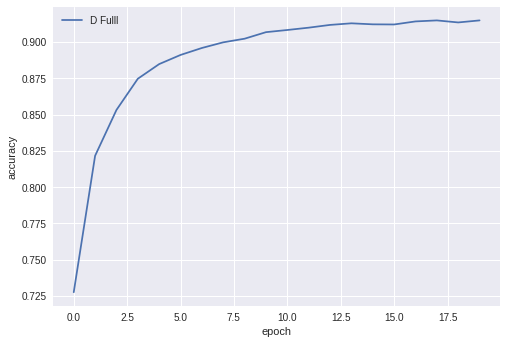

In [0]:
index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index, acc_full_again,label = "D Fulll")  #  'go-'
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show()

**Experiment 3 **

In [0]:
# Initialize param

learning_rate = 0.001
training_epochs = 50
batch_size = 500 # 100 # 1000
n_classes = 10
n_samples = 55000
n_input = 784
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

hl1_full_exp3 = tf.Variable(tf.random_normal([n_input, n_hidden_1]), name='wt_hl1_full_exp3')
hl2_full_exp3 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]), name='wt_hl2_full_exp3')
hl3_full_exp3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]), name='wt_hl3_full_exp3')
hl4_full_exp3 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]), name='wt_hl4_full_exp3')
hl5_full_exp3 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]), name='wt_hl5_full_exp3')
hl_out_full_exp3 = tf.Variable(tf.random_normal([n_hidden_5, n_classes]), name='wt_hl_out_full_exp3')

b1_full_exp3 = tf.Variable(tf.random_normal([n_hidden_1]), name='wt_b1_full_exp3')
b2_full_exp3 = tf.Variable(tf.random_normal([n_hidden_2]), name='wt_b2_full_exp3')
b3_full_exp3 = tf.Variable(tf.random_normal([n_hidden_3]), name='wt_b3_full_exp3')
b4_full_exp3 = tf.Variable(tf.random_normal([n_hidden_4]), name='wt_b4_full_exp3')
b5_full_exp3 = tf.Variable(tf.random_normal([n_hidden_5]), name='wt_b5_full_exp3')
b_out_full_exp3 = tf.Variable(tf.random_normal([n_classes]), name='wt_b_out_full_exp3')


# Function ff which will take the input data, hidden-layer neuron and bias and then perform the operation
# output of each layer will get passed to the successor layer.

def network_full_exp3(x):
  layer_1_full_exp3 = tf.add(tf.matmul(x, hl1_full_exp3), b1_full_exp3)
  layer_1_full_exp3 = tf.nn.relu(layer_1_full_exp3)
  
  layer_2_full_exp3 = tf.add(tf.matmul(layer_1_full_exp3, hl2_full_exp3),b2_full_exp3)
  layer_2_full_exp3 = tf.nn.relu(layer_2_full_exp3)
  
  layer_3_full_exp3 = tf.add(tf.matmul(layer_2_full_exp3, hl3_full_exp3),b3_full_exp3)
  layer_3_full_exp3 = tf.nn.relu(layer_3_full_exp3)
  
  layer_4_full_exp3 = tf.add(tf.matmul(layer_3_full_exp3, hl4_full_exp3),b4_full_exp3)
  layer_4_full_exp3 = tf.nn.relu(layer_4_full_exp3)
  
  layer_5_full_exp3 = tf.add(tf.matmul(layer_4_full_exp3, hl5_full_exp3),b5_full_exp3)
  layer_5_full_exp3 = tf.nn.relu(layer_5_full_exp3)
  
  
  out_layer_full_exp3 = tf.add(tf.matmul(layer_5_full_exp3, hl_out_full_exp3),b_out_full_exp3)
  
  return out_layer_full_exp3

# Input placeholder 

x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion

pred_full_exp3= network_full_exp3(x)

# Cost which we want to minimize

cost_full_exp3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred_full_exp3,labels = y))


# Opimizer

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_full_exp3)

# opening tf session

session = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
session.run(init)

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = session.run([optimizer, cost_full_exp3], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
    
  print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))
  
print("\nFinally the Model has completed {} epochs of training".format(training_epochs))
  
  


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


1 Epoch: cost is 6000274.9193 
2 Epoch: cost is 1153751.9477 
3 Epoch: cost is 589940.7641 
4 Epoch: cost is 324024.6842 
5 Epoch: cost is 174145.4601 
6 Epoch: cost is 91423.6199 
7 Epoch: cost is 57336.5582 
8 Epoch: cost is 30850.4739 
9 Epoch: cost is 16713.5037 
10 Epoch: cost is 12202.2108 
11 Epoch: cost is 9065.1810 
12 Epoch: cost is 10231.2914 
13 Epoch: cost is 13072.4727 
14 Epoch: cost is 14851.4826 
15 Epoch: cost is 9189.8007 
16 Epoch: cost is 13925.1711 
17 Epoch: cost is 13579.1672 
18 Epoch: cost is 13579.5531 
19 Epoch: cost is 19755.2124 
20 Epoch: cost is 20264.3829 
21 Epoch: cost is 16080.1884 
22 Epoch: cost is 19198.9743 
23 Epoch: cost is 15408.7713 
24 Epoch: cost is 15879.4375 
25 Epoch: cost is 30094.5646 
26 Epoch: cost is 23824.7559 
27 Epoch: cost is 21165.7649 
28 Epoch: cost is 20269.4128 
29 Epoch: cost is 13977.1867 
30 Epoch: cost is 12121.7146 
31 Epoch: cost is 17860.1381 
32 Epoch: cost is 12943.1651 
33 Epoch: cost is 15024.3562 
34 Epoch: cost

In [0]:
# Model Evaluation

# FInd the index location where the "pred" value is coming as 1. 

# FInd the index location where the "y" lable value is coming as 1.

# Finally compare the 2 values using tf.equal

correct_predictions_full_exp3 = tf.equal(tf.argmax(pred_full_exp3,1), tf.argmax(y,1))

In [0]:
# As the correct_predictions return type value is of type Boolean so will CAST it to Float

correct_predictions_full_exp3 = tf.cast(correct_predictions_full_exp3,float)

In [0]:
# Calculate MEAN across tensors which will give the Train Data Set Accuracy

accuracy_full_exp3 = tf.reduce_mean(correct_predictions_full_exp3)

**I noticed that if we change the parameters like learning rate or the number-of-epochs the accuracy can go upto around 96%**

**Experiment-3 Accuracy**

In [0]:
# Read the MNIST TEST data and calculate Test Data accuracy using "eval" function

accuracy_full_exp3.eval({x:mnist.test.images, y:mnist.test.labels})

0.9642

In [0]:
# Read the MNIST TEST data and calculate Test Data accuracy using "eval" function

accuracy_full_exp3.eval({x:mnist.test.images, y:mnist.test.labels})



0.9648

#SVD

**Experiment-1 with FULL SVD**

In [0]:
# Initialize param

learning_rate = 0.0001
training_epochs = 33 
batch_size = 100 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

def svd_new_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  #w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))
  return s, u, v

# Passed the already trained weights from the FULL netowrk and then ran them through SVD to generate s,u,v resp. matrix.

s_l1, u_l1, v_ll = svd_new_wt(w_hl1)
s_l2, u_l2, v_l2 = svd_new_wt(w_hl2)
s_l3, u_l3, v_l3 = svd_new_wt(w_hl3)
s_l4, u_l4, v_l4 = svd_new_wt(w_hl4)
s_l5, u_l5, v_l5 = svd_new_wt(w_hl5)
s_lout, u_lout, v_lout = svd_new_wt(w_hl_out)


def network(x):
    
  layer_1 = tf.add(tf.matmul(x, tf.matmul(u_l1, tf.matmul(tf.linalg.diag(s_l1), v_ll, adjoint_b=True))   ), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
  layer_2 = tf.add(tf.matmul(layer_1, tf.matmul(u_l2, tf.matmul(tf.linalg.diag(s_l2), v_l2, adjoint_b=True))   ), b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, tf.matmul(u_l3, tf.matmul(tf.linalg.diag(s_l3), v_l3, adjoint_b=True))   ), b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, tf.matmul(u_l4, tf.matmul(tf.linalg.diag(s_l4), v_l4, adjoint_b=True))   ), b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, tf.matmul(u_l5, tf.matmul(tf.linalg.diag(s_l5), v_l5, adjoint_b=True))   ), b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, tf.matmul(u_lout, tf.matmul(tf.linalg.diag(s_lout), v_lout, adjoint_b=True))   ), b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

acc=[]
ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  acc.append(acc_val)
  ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

#print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 1, Loss: 8637232.000000, Accuracy: 0.589500
epoch: 2, Loss: 4879053.500000, Accuracy: 0.748100
epoch: 3, Loss: 3720301.000000, Accuracy: 0.801400
epoch: 4, Loss: 3101591.500000, Accuracy: 0.829200
epoch: 5, Loss: 2700339.500000, Accuracy: 0.846300
epoch: 6, Loss: 2420818.250000, Accuracy: 0.859100
epoch: 7, Loss: 2220402.250000, Accuracy: 0.869700
epoch: 8, Loss: 2062938.875000, Accuracy: 0.876300
epoch: 9, Loss: 1908677.875000, Accuracy: 0.883800
epoch: 10, Loss: 1802324.750000, Accuracy: 0.888300
epoch: 11, Loss: 1711056.750000, Accuracy: 0.892200
epoch: 12, Loss: 1638109.750000, Accuracy: 0.893700
epoch: 13, Loss: 1563040.000000, Accuracy: 0.897900
epoch: 14, Loss: 1494339.000000, Accuracy: 0.899500
epoch: 15, Loss: 1442026.125000, Accuracy: 0.902100
epoch: 16, Loss: 1404072.750000, Accuracy: 0.902700
epoch: 17, Loss: 1372169.125000, Accuracy: 0.904700
epoch: 18, Loss: 1323544.500000, Accuracy: 0.906900
epoch: 19, Loss: 1291243.875000, Accuracy: 0.907700
epoch: 20, Loss: 1271

**Experiment-2 with FULL SVD**

In [0]:
# Initialize param

learning_rate = 0.0001
training_epochs = 50 
batch_size = 100 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

def svd_new_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  #w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))
  return s, u, v

# Passed the already trained weights from the FULL netowrk and then ran them through SVD to generate s,u,v resp. matrix.

s_l1, u_l1, v_ll = svd_new_wt(w_hl1)
s_l2, u_l2, v_l2 = svd_new_wt(w_hl2)
s_l3, u_l3, v_l3 = svd_new_wt(w_hl3)
s_l4, u_l4, v_l4 = svd_new_wt(w_hl4)
s_l5, u_l5, v_l5 = svd_new_wt(w_hl5)
s_lout, u_lout, v_lout = svd_new_wt(w_hl_out)


def network(x):
    
  layer_1 = tf.add(tf.matmul(x, tf.matmul(u_l1, tf.matmul(tf.linalg.diag(s_l1), v_ll, adjoint_b=True))   ), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
  layer_2 = tf.add(tf.matmul(layer_1, tf.matmul(u_l2, tf.matmul(tf.linalg.diag(s_l2), v_l2, adjoint_b=True))   ), b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, tf.matmul(u_l3, tf.matmul(tf.linalg.diag(s_l3), v_l3, adjoint_b=True))   ), b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, tf.matmul(u_l4, tf.matmul(tf.linalg.diag(s_l4), v_l4, adjoint_b=True))   ), b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, tf.matmul(u_l5, tf.matmul(tf.linalg.diag(s_l5), v_l5, adjoint_b=True))   ), b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, tf.matmul(u_lout, tf.matmul(tf.linalg.diag(s_lout), v_lout, adjoint_b=True))   ), b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

acc=[]
ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  acc.append(acc_val)
  ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

#print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

epoch: 1, Loss: 3199060.750000, Accuracy: 0.813200
epoch: 2, Loss: 2102676.750000, Accuracy: 0.869700
epoch: 3, Loss: 1675456.750000, Accuracy: 0.889300
epoch: 4, Loss: 1433160.250000, Accuracy: 0.898800
epoch: 5, Loss: 1255004.875000, Accuracy: 0.908400
epoch: 6, Loss: 1176627.875000, Accuracy: 0.909900
epoch: 7, Loss: 1079087.750000, Accuracy: 0.914800
epoch: 8, Loss: 1009798.125000, Accuracy: 0.918400
epoch: 9, Loss: 963636.000000, Accuracy: 0.921000
epoch: 10, Loss: 944881.062500, Accuracy: 0.921000


**Experiment-3 with FULL SVD. Here, kept SVD as a part of Network to compare how it is impacting on the Time performance.**

In [0]:
# Initialize param

learning_rate = 0.0001
training_epochs = 19 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

def svd_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))
  return w_approx
  
def network(x):
    
  layer_1 = tf.add(tf.matmul(x, svd_wt(w_hl1)), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
  layer_2 = tf.add(tf.matmul(layer_1, svd_wt(w_hl2)),b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, svd_wt(w_hl3)),b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, svd_wt(w_hl4)),b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, svd_wt(w_hl5)),b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, svd_wt(w_hl_out)),b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

acc=[]
ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  acc.append(acc_val)
  ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

#print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

Instructions for updating:
Colocations handled automatically by placer.
epoch: 1, Loss: 8544295.000000, Accuracy: 0.602800
epoch: 2, Loss: 4738181.500000, Accuracy: 0.739200
epoch: 3, Loss: 3479391.500000, Accuracy: 0.794400
epoch: 4, Loss: 2810525.500000, Accuracy: 0.827800
epoch: 5, Loss: 2414715.250000, Accuracy: 0.847400
epoch: 6, Loss: 2147620.750000, Accuracy: 0.859400
epoch: 7, Loss: 1956019.875000, Accuracy: 0.867300
epoch: 8, Loss: 1802269.875000, Accuracy: 0.875100
epoch: 9, Loss: 1673225.625000, Accuracy: 0.881200
epoch: 10, Loss: 1574251.250000, Accuracy: 0.885400
epoch: 11, Loss: 1498076.625000, Accuracy: 0.888100
epoch: 12, Loss: 1428084.750000, Accuracy: 0.893100
epoch: 13, Loss: 1373407.125000, Accuracy: 0.895400
epoch: 14, Loss: 1337777.000000, Accuracy: 0.897800
epoch: 15, Loss: 1286136.375000, Accuracy: 0.900100
epoch: 16, Loss: 1244613.875000, Accuracy: 0.901200
epoch: 17, Loss: 1215936.500000, Accuracy: 0.902900
epoch: 18, Loss: 1186409.250000, Accuracy: 0.904300
e

**Experiment-1:**

**Perform SVD with D=10**

In [0]:
tf.reset_default_graph()

# Initialize param

learning_rate = 0.0001
training_epochs = 50 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 10

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

##########
def svd_new_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  return s[:D], u[:, :D], v[:, :D]

# Passed the already trained weights from the FULL netowrk and then ran them through SVD to generate s,u,v resp. matrix.

s_l1, u_l1, v_ll = svd_new_wt(w_hl1)
s_l2, u_l2, v_l2 = svd_new_wt(w_hl2)
s_l3, u_l3, v_l3 = svd_new_wt(w_hl3)
s_l4, u_l4, v_l4 = svd_new_wt(w_hl4)
s_l5, u_l5, v_l5 = svd_new_wt(w_hl5)
s_lout, u_lout, v_lout = svd_new_wt(w_hl_out)


def network(x):
    
  layer_1 = tf.add(tf.matmul(x, tf.matmul(u_l1, tf.matmul(tf.linalg.diag(s_l1), v_ll, adjoint_b=True))   ), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
  layer_2 = tf.add(tf.matmul(layer_1, tf.matmul(u_l2, tf.matmul(tf.linalg.diag(s_l2), v_l2, adjoint_b=True))   ), b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, tf.matmul(u_l3, tf.matmul(tf.linalg.diag(s_l3), v_l3, adjoint_b=True))   ), b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, tf.matmul(u_l4, tf.matmul(tf.linalg.diag(s_l4), v_l4, adjoint_b=True))   ), b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, tf.matmul(u_l5, tf.matmul(tf.linalg.diag(s_l5), v_l5, adjoint_b=True))   ), b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, tf.matmul(u_lout, tf.matmul(tf.linalg.diag(s_lout), v_lout, adjoint_b=True))   ), b_out)
  
  return out_layer


##########


# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

acc=[]
ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  acc.append(acc_val)
  ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 1, Loss: 564.259521, Accuracy: 0.229200
epoch: 2, Loss: 235.795197, Accuracy: 0.260000
epoch: 3, Loss: 157.836731, Accuracy: 0.265800
epoch: 4, Loss: 112.875572, Accuracy: 0.276700
epoch: 5, Loss: 85.747391, Accuracy: 0.315100
epoch: 6, Loss: 79.997169, Accuracy: 0.311400
epoch: 7, Loss: 55.804905, Accuracy: 0.304400
epoch: 8, Loss: 89.205772, Accuracy: 0.238600
epoch: 9, Loss: 86.715683, Accuracy: 0.233200
epoch: 10, Loss: 41.201611, Accuracy: 0.321100
epoch: 11, Loss: 46.219070, Accuracy: 0.311500
epoch: 12, Loss: 28.101759, Accuracy: 0.310800
epoch: 13, Loss: 35.457592, Accuracy: 0.245700
epoch: 14, Loss: 32.670399, Accuracy: 0.283400
epoch: 15, Loss: 42.931995, Accuracy: 0.273100
epoch: 16, Loss: 28.127251, Accuracy: 0.257500
epoch: 17, Loss: 23.626900, Accuracy: 0.292700
epoch: 18, Loss: 14.754481, Accuracy: 0.299800
epoch: 19, Loss: 18.233999, Accuracy: 0.318300
epoch: 20, Loss: 17.031281, Accuracy: 0.290400
epoch: 21, Loss: 11.663811, Accuracy: 0.271400
epoch: 22, Loss: 1

**Experiment-1:**

**Perform SVD with D=20**

In [0]:
tf.reset_default_graph()

# Initialize param

learning_rate = 0.01
training_epochs = 26
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 20

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization


w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

##########
def svd_new_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  return s[:D], u[:, :D], v[:, :D]

# Passed the already trained weights from the FULL netowrk and then ran them through SVD to generate s,u,v resp. matrix.

s_l1, u_l1, v_ll = svd_new_wt(w_hl1)
s_l2, u_l2, v_l2 = svd_new_wt(w_hl2)
s_l3, u_l3, v_l3 = svd_new_wt(w_hl3)
s_l4, u_l4, v_l4 = svd_new_wt(w_hl4)
s_l5, u_l5, v_l5 = svd_new_wt(w_hl5)
s_lout, u_lout, v_lout = svd_new_wt(w_hl_out)


def network(x):
    
  layer_1 = tf.add(tf.matmul(x, tf.matmul(u_l1, tf.matmul(tf.linalg.diag(s_l1), v_ll, adjoint_b=True))   ), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
  layer_2 = tf.add(tf.matmul(layer_1, tf.matmul(u_l2, tf.matmul(tf.linalg.diag(s_l2), v_l2, adjoint_b=True))   ), b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, tf.matmul(u_l3, tf.matmul(tf.linalg.diag(s_l3), v_l3, adjoint_b=True))   ), b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, tf.matmul(u_l4, tf.matmul(tf.linalg.diag(s_l4), v_l4, adjoint_b=True))   ), b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, tf.matmul(u_l5, tf.matmul(tf.linalg.diag(s_l5), v_l5, adjoint_b=True))   ), b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, tf.matmul(u_lout, tf.matmul(tf.linalg.diag(s_lout), v_lout, adjoint_b=True))   ), b_out)
  
  return out_layer


##########
# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

D_20_acc=[]
D_20_ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  D_20_acc.append(acc_val)
  D_20_ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

#print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

Instructions for updating:
Colocations handled automatically by placer.
epoch: 1, Loss: 1117.315186, Accuracy: 0.694200
epoch: 2, Loss: 456.442413, Accuracy: 0.747200
epoch: 3, Loss: 329.337311, Accuracy: 0.768100
epoch: 4, Loss: 248.771957, Accuracy: 0.743900
epoch: 5, Loss: 175.067932, Accuracy: 0.751700
epoch: 6, Loss: 146.174301, Accuracy: 0.740600
epoch: 7, Loss: 119.013626, Accuracy: 0.731300
epoch: 8, Loss: 98.364731, Accuracy: 0.762100
epoch: 9, Loss: 76.400269, Accuracy: 0.779700
epoch: 10, Loss: 56.876362, Accuracy: 0.777700
epoch: 11, Loss: 36.929024, Accuracy: 0.801900
epoch: 12, Loss: 51.898613, Accuracy: 0.785000
epoch: 13, Loss: 54.153236, Accuracy: 0.762000
epoch: 14, Loss: 35.276592, Accuracy: 0.774300
epoch: 15, Loss: 38.372028, Accuracy: 0.787600
epoch: 16, Loss: 33.403526, Accuracy: 0.761800
epoch: 17, Loss: 23.752239, Accuracy: 0.796300
epoch: 18, Loss: 23.496265, Accuracy: 0.801200
epoch: 19, Loss: 21.998596, Accuracy: 0.811000
epoch: 20, Loss: 18.212563, Accuracy

**Experiment-2:**


**Perform SVD with D=20. Here, kept SVD as a part of Network to compare how it is impacting on the Time performance.**

In [0]:

# Initialize param

learning_rate = 0.0001
training_epochs = 50 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 20

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

def svd_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  #print("s.shape", s.shape, ", u.shape", u.shape, ", v.shape", v.shape)
  print("s.shape  D ", s[:D].shape, ", u.shape  D", u[:, :D].shape, ", v.shape  D", v[:D, :].shape)
  #print(tf.transpose(v).shape)
  w_approx = tf.matmul(u[:, :D], tf.matmul(tf.linalg.diag(s[:D]), (v[:, :D]), adjoint_b=True))
  
 # w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))  tf.transpose
  
  
  print("w_approx:", w_approx.shape)
  
  return w_approx
  
  #reconstimg = np.matrix() * np.diag(sigma[:1]) * np.matrix(V[:1, :])
  
def network(x):
  
  print("x.shape", x.shape, "b1", b1.shape)
  
  layer_1 = tf.add(tf.matmul(x, svd_wt(w_hl1)), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
    
  layer_2 = tf.add(tf.matmul(layer_1, svd_wt(w_hl2)),b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, svd_wt(w_hl3)),b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, svd_wt(w_hl4)),b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, svd_wt(w_hl5)),b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_1, svd_wt(w_hl_out)),b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

D_20_acc=[]
D_20_ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  D_20_acc.append(acc_val)
  D_20_ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

x.shape (?, 784) b1 (1024,)
s.shape  D  (20,) , u.shape  D (784, 20) , v.shape  D (20, 784)
w_approx: (784, 1024)
s.shape  D  (20,) , u.shape  D (1024, 20) , v.shape  D (20, 1024)
w_approx: (1024, 1024)
s.shape  D  (20,) , u.shape  D (1024, 20) , v.shape  D (20, 1024)
w_approx: (1024, 1024)
s.shape  D  (20,) , u.shape  D (1024, 20) , v.shape  D (20, 1024)
w_approx: (1024, 1024)
s.shape  D  (20,) , u.shape  D (1024, 20) , v.shape  D (20, 1024)
w_approx: (1024, 1024)
s.shape  D  (10,) , u.shape  D (1024, 10) , v.shape  D (10, 10)
w_approx: (1024, 10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 1, Loss: 14.781059, Accuracy: 0.470600
epoch: 2, Loss: 8.725929, Accuracy: 0.603200
epoch: 3, Loss: 6.321678, Accuracy: 0.667300
epoch: 4, Loss: 5.033588, Accuracy: 0.705500
epoch: 5, Loss: 4.240058, Accuracy: 0.727000
epoch: 6, Loss: 3.677136, Accuracy: 0.743600
epoch: 7, Loss: 3.266654, Accuracy: 0.760100
epoch: 8, Loss: 2.979029, Accuracy: 0.772900
epoch: 9, Loss: 2.730266, Accuracy: 0.783900
epoch: 10, Loss: 2.551973, Accuracy: 0.794000
epoch: 11, Loss: 2.412861, Accuracy: 0.802300
epoch: 12, Loss: 2.234554, Accuracy: 0.808300
epoch: 13, Loss: 2.132636, Accuracy: 0.812500
epoch: 14, Loss: 2.035434, Accuracy: 0.820500
epoch: 15, Loss: 1.930708, Accuracy: 0.826500
epoch: 16, Loss: 1.867882, Accuracy: 0.827200
epoch: 17, Loss: 1.789609, Accuracy: 0.832300
epoch: 18, Loss: 1.734945, Accuracy: 0.837100
epoch: 19, Loss: 1.655698, Accuracy: 0.841400
epoch: 20, Loss: 1.615568, Accuracy: 0.844900
epoch: 21, Loss: 1.558126, Accuracy: 0.846900
epoch: 22, Loss: 1.549735, Accuracy: 0.846

**Draw accuracy visualization for D=10 and D=20**

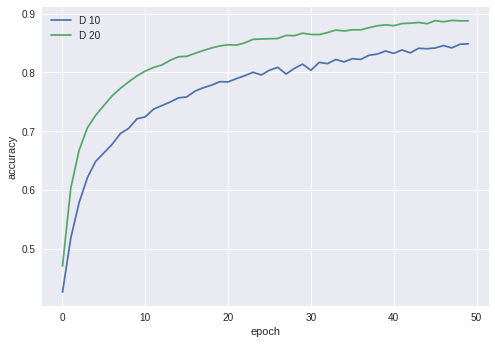

In [0]:
index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index, acc,label = "D 10")  #  'go-'
plt.plot(index, D_20_acc,label = "D 20")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show()

**Experiment-1:**

**Perform SVD with D=50**

In [3]:

tf.reset_default_graph()

# Initialize param

learning_rate = 0.01
training_epochs = 50 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 50

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization


w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

##########
def svd_new_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  return s[:D], u[:, :D], v[:, :D]

# Passed the already trained weights from the FULL netowrk and then ran them through SVD to generate s,u,v resp. matrix.

s_l1, u_l1, v_ll = svd_new_wt(w_hl1)
s_l2, u_l2, v_l2 = svd_new_wt(w_hl2)
s_l3, u_l3, v_l3 = svd_new_wt(w_hl3)
s_l4, u_l4, v_l4 = svd_new_wt(w_hl4)
s_l5, u_l5, v_l5 = svd_new_wt(w_hl5)
s_lout, u_lout, v_lout = svd_new_wt(w_hl_out)


def network(x):
    
  layer_1 = tf.add(tf.matmul(x, tf.matmul(u_l1, tf.matmul(tf.linalg.diag(s_l1), v_ll, adjoint_b=True))   ), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
  layer_2 = tf.add(tf.matmul(layer_1, tf.matmul(u_l2, tf.matmul(tf.linalg.diag(s_l2), v_l2, adjoint_b=True))   ), b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, tf.matmul(u_l3, tf.matmul(tf.linalg.diag(s_l3), v_l3, adjoint_b=True))   ), b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, tf.matmul(u_l4, tf.matmul(tf.linalg.diag(s_l4), v_l4, adjoint_b=True))   ), b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, tf.matmul(u_l5, tf.matmul(tf.linalg.diag(s_l5), v_l5, adjoint_b=True))   ), b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, tf.matmul(u_lout, tf.matmul(tf.linalg.diag(s_lout), v_lout, adjoint_b=True))   ), b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

D_50_acc=[]
D_50_ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  D_50_acc.append(acc_val)
  D_50_ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

Instructions for updating:
Colocations handled automatically by placer.
epoch: 1, Loss: 13998.368164, Accuracy: 0.869000
epoch: 2, Loss: 9220.822266, Accuracy: 0.904300
epoch: 3, Loss: 6919.403320, Accuracy: 0.897800
epoch: 4, Loss: 5224.169434, Accuracy: 0.912900
epoch: 5, Loss: 4634.562500, Accuracy: 0.921400
epoch: 6, Loss: 4539.599609, Accuracy: 0.916200
epoch: 7, Loss: 4457.813477, Accuracy: 0.921000
epoch: 8, Loss: 3859.070312, Accuracy: 0.929400
epoch: 9, Loss: 3386.437256, Accuracy: 0.931500
epoch: 10, Loss: 3053.893555, Accuracy: 0.937500
epoch: 11, Loss: 3313.233887, Accuracy: 0.934600
epoch: 12, Loss: 3765.377686, Accuracy: 0.933900
epoch: 13, Loss: 3120.511963, Accuracy: 0.943100
epoch: 14, Loss: 3377.823486, Accuracy: 0.939500
epoch: 15, Loss: 2828.186035, Accuracy: 0.944500
epoch: 16, Loss: 3250.118652, Accuracy: 0.940000
epoch: 17, Loss: 2798.501709, Accuracy: 0.941600
epoch: 18, Loss: 2520.488281, Accuracy: 0.952000
epoch: 19, Loss: 2549.395508, Accuracy: 0.951500
epoch

**Experiment-2:**

**Perform SVD with D=50. Here, kept SVD as a part of Network to compare how it is impacting on the Time performance.**



In [0]:

# Initialize param

learning_rate = 0.0001
training_epochs = 50 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 50

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

def svd_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  #print("s.shape", s.shape, ", u.shape", u.shape, ", v.shape", v.shape)
  print("s.shape  D ", s[:D].shape, ", u.shape  D", u[:, :D].shape, ", v.shape  D", v[:D, :].shape)
  #print(tf.transpose(v).shape)
  w_approx = tf.matmul(u[:, :D], tf.matmul(tf.linalg.diag(s[:D]), (v[:, :D]), adjoint_b=True))
  
 # w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))  tf.transpose
  
  
  print("w_approx:", w_approx.shape)
  
  return w_approx
  
  #reconstimg = np.matrix() * np.diag(sigma[:1]) * np.matrix(V[:1, :])
  
def network(x):
  
  print("x.shape", x.shape, "b1", b1.shape)
  
  layer_1 = tf.add(tf.matmul(x, svd_wt(w_hl1)), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
    
  layer_2 = tf.add(tf.matmul(layer_1, svd_wt(w_hl2)),b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, svd_wt(w_hl3)),b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, svd_wt(w_hl4)),b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, svd_wt(w_hl5)),b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_1, svd_wt(w_hl_out)),b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

D_50_acc=[]
D_50_ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  D_50_acc.append(acc_val)
  D_50_ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

x.shape (?, 784) b1 (1024,)
s.shape  D  (50,) , u.shape  D (784, 50) , v.shape  D (50, 784)
w_approx: (784, 1024)
s.shape  D  (50,) , u.shape  D (1024, 50) , v.shape  D (50, 1024)
w_approx: (1024, 1024)
s.shape  D  (50,) , u.shape  D (1024, 50) , v.shape  D (50, 1024)
w_approx: (1024, 1024)
s.shape  D  (50,) , u.shape  D (1024, 50) , v.shape  D (50, 1024)
w_approx: (1024, 1024)
s.shape  D  (50,) , u.shape  D (1024, 50) , v.shape  D (50, 1024)
w_approx: (1024, 1024)
s.shape  D  (10,) , u.shape  D (1024, 10) , v.shape  D (10, 10)
w_approx: (1024, 10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 1, Loss: 26.765430, Accuracy: 0.480100
epoch: 2, Loss: 14.227187, Accuracy: 0.647300
epoch: 3, Loss: 9.872759, Accuracy: 0.722400
epoch: 4, Loss: 7.736717, Accuracy: 0.761200
epoch: 5, Loss: 6.376013, Accuracy: 0.792200
epoch: 6, Loss: 5.551782, Accuracy: 0.811800
epoch: 7, Loss: 4.954555, Accuracy: 0.822900
epoch: 8, Loss: 4.476598, Accuracy: 0.836600
epoch: 9, Loss: 4.134876, Accuracy: 0.844100
epoch: 10, Loss: 3.876292, Accuracy: 0.851300
epoch: 11, Loss: 3.601130, Accuracy: 0.857600
epoch: 12, Loss: 3.411886, Accuracy: 0.861000
epoch: 13, Loss: 3.225298, Accuracy: 0.864800
epoch: 14, Loss: 3.075158, Accuracy: 0.869200
epoch: 15, Loss: 2.945181, Accuracy: 0.873000
epoch: 16, Loss: 2.785242, Accuracy: 0.878200
epoch: 17, Loss: 2.686245, Accuracy: 0.880300
epoch: 18, Loss: 2.629899, Accuracy: 0.882900
epoch: 19, Loss: 2.490740, Accuracy: 0.885400
epoch: 20, Loss: 2.452817, Accuracy: 0.890000
epoch: 21, Loss: 2.373097, Accuracy: 0.891600
epoch: 22, Loss: 2.283190, Accuracy: 0.89

**Draw accuracy visualization for D=10, D=20 and D=50**

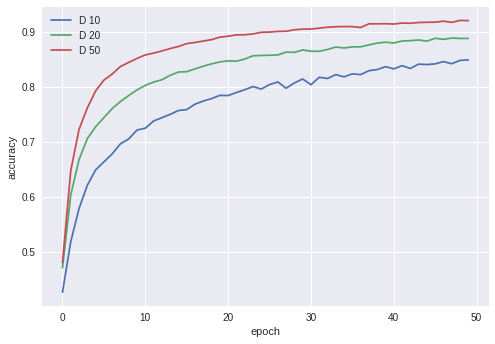

In [0]:
index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index, acc,label = "D 10")  #  'go-'
plt.plot(index, D_20_acc,label = "D 20")
plt.plot(index, D_50_acc,label = "D 50")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show()

**Experiment-1**

**Perform SVD with D=100**


In [3]:

tf.reset_default_graph()

# Initialize param

learning_rate = 0.01
training_epochs = 50 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 100

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization


w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

##########
def svd_new_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  return s[:D], u[:, :D], v[:, :D]

# Passed the already trained weights from the FULL netowrk and then ran them through SVD to generate s,u,v resp. matrix.

s_l1, u_l1, v_ll = svd_new_wt(w_hl1)
s_l2, u_l2, v_l2 = svd_new_wt(w_hl2)
s_l3, u_l3, v_l3 = svd_new_wt(w_hl3)
s_l4, u_l4, v_l4 = svd_new_wt(w_hl4)
s_l5, u_l5, v_l5 = svd_new_wt(w_hl5)
s_lout, u_lout, v_lout = svd_new_wt(w_hl_out)


def network(x):
    
  layer_1 = tf.add(tf.matmul(x, tf.matmul(u_l1, tf.matmul(tf.linalg.diag(s_l1), v_ll, adjoint_b=True))   ), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
  layer_2 = tf.add(tf.matmul(layer_1, tf.matmul(u_l2, tf.matmul(tf.linalg.diag(s_l2), v_l2, adjoint_b=True))   ), b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, tf.matmul(u_l3, tf.matmul(tf.linalg.diag(s_l3), v_l3, adjoint_b=True))   ), b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, tf.matmul(u_l4, tf.matmul(tf.linalg.diag(s_l4), v_l4, adjoint_b=True))   ), b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, tf.matmul(u_l5, tf.matmul(tf.linalg.diag(s_l5), v_l5, adjoint_b=True))   ), b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, tf.matmul(u_lout, tf.matmul(tf.linalg.diag(s_lout), v_lout, adjoint_b=True))   ), b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

D_100_acc=[]
D_100_ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  D_100_acc.append(acc_val)
  D_100_ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

Instructions for updating:
Colocations handled automatically by placer.
epoch: 1, Loss: 58963.992188, Accuracy: 0.901100
epoch: 2, Loss: 40162.902344, Accuracy: 0.924200
epoch: 3, Loss: 35128.644531, Accuracy: 0.925700
epoch: 4, Loss: 29109.744141, Accuracy: 0.940500
epoch: 5, Loss: 26673.003906, Accuracy: 0.944300
epoch: 6, Loss: 30150.816406, Accuracy: 0.938500
epoch: 7, Loss: 28789.357422, Accuracy: 0.945300
epoch: 8, Loss: 25658.648438, Accuracy: 0.949100
epoch: 9, Loss: 24179.333984, Accuracy: 0.947300
epoch: 10, Loss: 24290.755859, Accuracy: 0.952700
epoch: 11, Loss: 22138.541016, Accuracy: 0.956400
epoch: 12, Loss: 27234.873047, Accuracy: 0.950900
epoch: 13, Loss: 25697.039062, Accuracy: 0.955600
epoch: 14, Loss: 26711.503906, Accuracy: 0.955400
epoch: 15, Loss: 22769.394531, Accuracy: 0.958800
epoch: 16, Loss: 23803.703125, Accuracy: 0.958000
epoch: 17, Loss: 27429.744141, Accuracy: 0.956000
epoch: 18, Loss: 25384.601562, Accuracy: 0.957500
epoch: 19, Loss: 26215.376953, Accura

**Experiment-2**

**Perform SVD with D=100.Here, kept SVD as a part of Network to compare how it is impacting on the Time performance.**

x.shape (?, 784) b1 (1024,)
s.shape  D  (100,) , u.shape  D (784, 100) , v.shape  D (100, 784)
w_approx: (784, 1024)
s.shape  D  (100,) , u.shape  D (1024, 100) , v.shape  D (100, 1024)
w_approx: (1024, 1024)
s.shape  D  (100,) , u.shape  D (1024, 100) , v.shape  D (100, 1024)
w_approx: (1024, 1024)
s.shape  D  (100,) , u.shape  D (1024, 100) , v.shape  D (100, 1024)
w_approx: (1024, 1024)
s.shape  D  (100,) , u.shape  D (1024, 100) , v.shape  D (100, 1024)
w_approx: (1024, 1024)
s.shape  D  (10,) , u.shape  D (1024, 10) , v.shape  D (10, 10)
w_approx: (1024, 10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 1, Loss: 38.640217, Accuracy: 0.463700
epoch: 2, Loss: 19.876127, Accuracy: 0.648900
epoch: 3, Loss: 14.304672, Accuracy: 0.724800
epoch: 4, Loss: 11.702964, Accuracy: 0.760600
epoch: 5, Loss: 10.082742, Accuracy: 0.787800
epoch: 6, Loss: 8.925373, Accuracy: 0.806600
epoch: 7, Loss: 8.127313, Accuracy: 0.822000
epoch: 8, Loss: 7.482914, Accuracy: 0.832300
epoch: 9, Loss: 6.931222, Accuracy: 0.840300
epoch: 10, Loss: 6.496696, Accuracy: 0.846900
epoch: 11, Loss: 6.105955, Accuracy: 0.853600
epoch: 12, Loss: 5.814317, Accuracy: 0.856500
epoch: 13, Loss: 5.499956, Accuracy: 0.863900
epoch: 14, Loss: 5.270576, Accuracy: 0.867200
epoch: 15, Loss: 5.026341, Accuracy: 0.870700
epoch: 16, Loss: 4.798862, Accuracy: 0.874300
epoch: 17, Loss: 4.683890, Accuracy: 0.878900
epoch: 18, Loss: 4.463112, Accuracy: 0.881400
epoch: 19, Loss: 4.328986, Accuracy: 0.883200
epoch: 20, Loss: 4.230104, Accuracy: 0.884900
epoch: 21, Loss: 4.030989, Accuracy: 0.888200
epoch: 22, Loss: 3.923255, Accuracy: 0

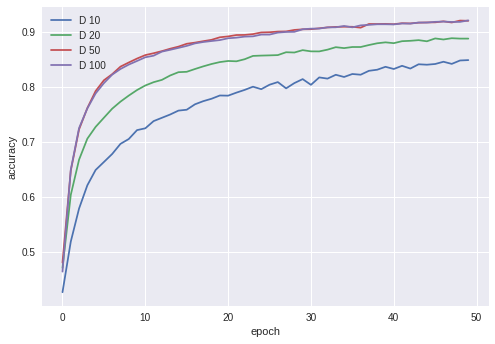

In [0]:

# Initialize param

learning_rate = 0.0001
training_epochs = 50 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 100

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

def svd_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  #print("s.shape", s.shape, ", u.shape", u.shape, ", v.shape", v.shape)
  print("s.shape  D ", s[:D].shape, ", u.shape  D", u[:, :D].shape, ", v.shape  D", v[:D, :].shape)
  #print(tf.transpose(v).shape)
  w_approx = tf.matmul(u[:, :D], tf.matmul(tf.linalg.diag(s[:D]), (v[:, :D]), adjoint_b=True))
  
 # w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))  tf.transpose
  
  
  print("w_approx:", w_approx.shape)
  
  return w_approx
  
  #reconstimg = np.matrix() * np.diag(sigma[:1]) * np.matrix(V[:1, :])
  
def network(x):
  
  print("x.shape", x.shape, "b1", b1.shape)
  
  layer_1 = tf.add(tf.matmul(x, svd_wt(w_hl1)), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
    
  layer_2 = tf.add(tf.matmul(layer_1, svd_wt(w_hl2)),b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, svd_wt(w_hl3)),b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, svd_wt(w_hl4)),b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, svd_wt(w_hl5)),b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_1, svd_wt(w_hl_out)),b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

D_100_acc=[]
D_100_ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  D_100_acc.append(acc_val)
  D_100_ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

# Draw accuracy visualization for D=10 , D=20, D=50 and D=100

index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index, acc,label = "D 10")  #  'go-'
plt.plot(index, D_20_acc,label = "D 20")
plt.plot(index, D_50_acc,label = "D 50")
plt.plot(index, D_100_acc,label = "D 100")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show()

**Experiment-1**

**Perform SVD with D=200.**

In [0]:
# Initialize param

learning_rate = 0.0001
training_epochs = 50 
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784

# Hidden Layers Parameters
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024

D = 200

# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

w_hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w_hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w_hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
w_hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
w_hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
w_hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

def svd_wt(wt):
  s, u, v = tf.linalg.svd(wt)
  #print("s.shape", s.shape, ", u.shape", u.shape, ", v.shape", v.shape)
  print("s.shape  D ", s[:D].shape, ", u.shape  D", u[:, :D].shape, ", v.shape  D", v[:D, :].shape)
  #print(tf.transpose(v).shape)
  w_approx = tf.matmul(u[:, :D], tf.matmul(tf.linalg.diag(s[:D]), (v[:, :D]), adjoint_b=True))
  
 # w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))  tf.transpose
  
  
  print("w_approx:", w_approx.shape)
  
  return w_approx
  
  #reconstimg = np.matrix() * np.diag(sigma[:1]) * np.matrix(V[:1, :])
  
def network(x):
  
  print("x.shape", x.shape, "b1", b1.shape)
  
  layer_1 = tf.add(tf.matmul(x, svd_wt(w_hl1)), b1)
  layer_1 = tf.nn.relu(layer_1)  
  
    
  layer_2 = tf.add(tf.matmul(layer_1, svd_wt(w_hl2)),b2)
  layer_2 = tf.nn.relu(layer_2)
    
  layer_3 = tf.add(tf.matmul(layer_2, svd_wt(w_hl3)),b3)
  layer_3 = tf.nn.relu(layer_3)
   
  layer_4 = tf.add(tf.matmul(layer_3, svd_wt(w_hl4)),b4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, svd_wt(w_hl5)),b5)
  layer_5 = tf.nn.relu(layer_5)
  
  out_layer = tf.add(tf.matmul(layer_5, svd_wt(w_hl_out)),b_out)
  
  return out_layer

# Input placeholder 
x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion
pred = network(x)

# Cost which we want to minimize
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

D_200_acc=[]
D_200_ls=[]

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
  
  loss_val, acc_val = sess.run([cost, accuracy],feed_dict={x:mnist.test.images,y:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val, acc_val))
  
  D_200_acc.append(acc_val)
  D_200_ls.append(loss_val)
  
  #print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))

index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index, acc,label = "D 10")  #  'go-'
plt.plot(index, D_20_acc,label = "D 20")
plt.plot(index, D_50_acc,label = "D 50")
plt.plot(index, D_100_acc,label = "D 100")
plt.plot(index, D_200_acc,label = "D 200")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show()

Instructions for updating:
Colocations handled automatically by placer.
x.shape (?, 784) b1 (1024,)
s.shape  D  (200,) , u.shape  D (784, 200) , v.shape  D (200, 784)
w_approx: (784, 1024)
s.shape  D  (200,) , u.shape  D (1024, 200) , v.shape  D (200, 1024)
w_approx: (1024, 1024)
s.shape  D  (200,) , u.shape  D (1024, 200) , v.shape  D (200, 1024)
w_approx: (1024, 1024)
s.shape  D  (200,) , u.shape  D (1024, 200) , v.shape  D (200, 1024)
w_approx: (1024, 1024)
s.shape  D  (200,) , u.shape  D (1024, 200) , v.shape  D (200, 1024)
w_approx: (1024, 1024)
s.shape  D  (10,) , u.shape  D (1024, 10) , v.shape  D (10, 10)
w_approx: (1024, 10)
epoch: 1, Loss: 61.676273, Accuracy: 0.366300
epoch: 2, Loss: 31.769438, Accuracy: 0.591500
epoch: 3, Loss: 22.446989, Accuracy: 0.688000
epoch: 4, Loss: 17.885790, Accuracy: 0.738600
epoch: 5, Loss: 15.105697, Accuracy: 0.770000
epoch: 6, Loss: 13.174941, Accuracy: 0.793700
epoch: 7, Loss: 11.802029, Accuracy: 0.811600
epoch: 8, Loss: 10.681028, Accuracy:

NameError: ignored

**Draw accuracy visualization for D=10, D=20, D=50, D=100 and D=200**


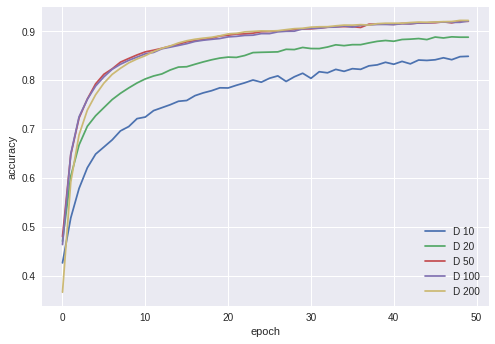

In [0]:

index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index, acc,label = "D 10")  #  'go-'
plt.plot(index, D_20_acc,label = "D 20")
plt.plot(index, D_50_acc,label = "D 50")
plt.plot(index, D_100_acc,label = "D 100")
plt.plot(index, D_200_acc,label = "D 200")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show()